In [3]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Sex_male    891 non-null    bool   
 7   Embarked_Q  891 non-null    bool   
 8   Embarked_S  891 non-null    bool   
dtypes: bool(3), float64(2), int64(4)
memory usage: 44.5 KB
None
         Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.361582    0.523008    0.381594   32.204208
std      0.486592    0.836071   13.019697    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000   

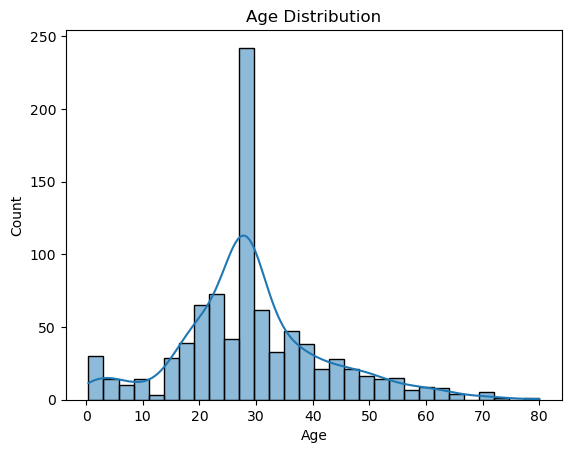

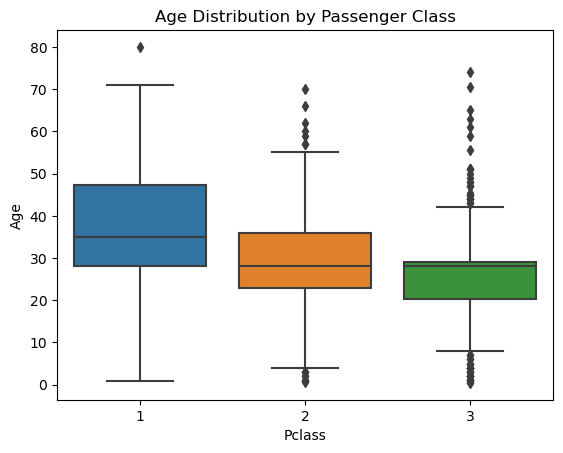

C:\Users\mamata\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


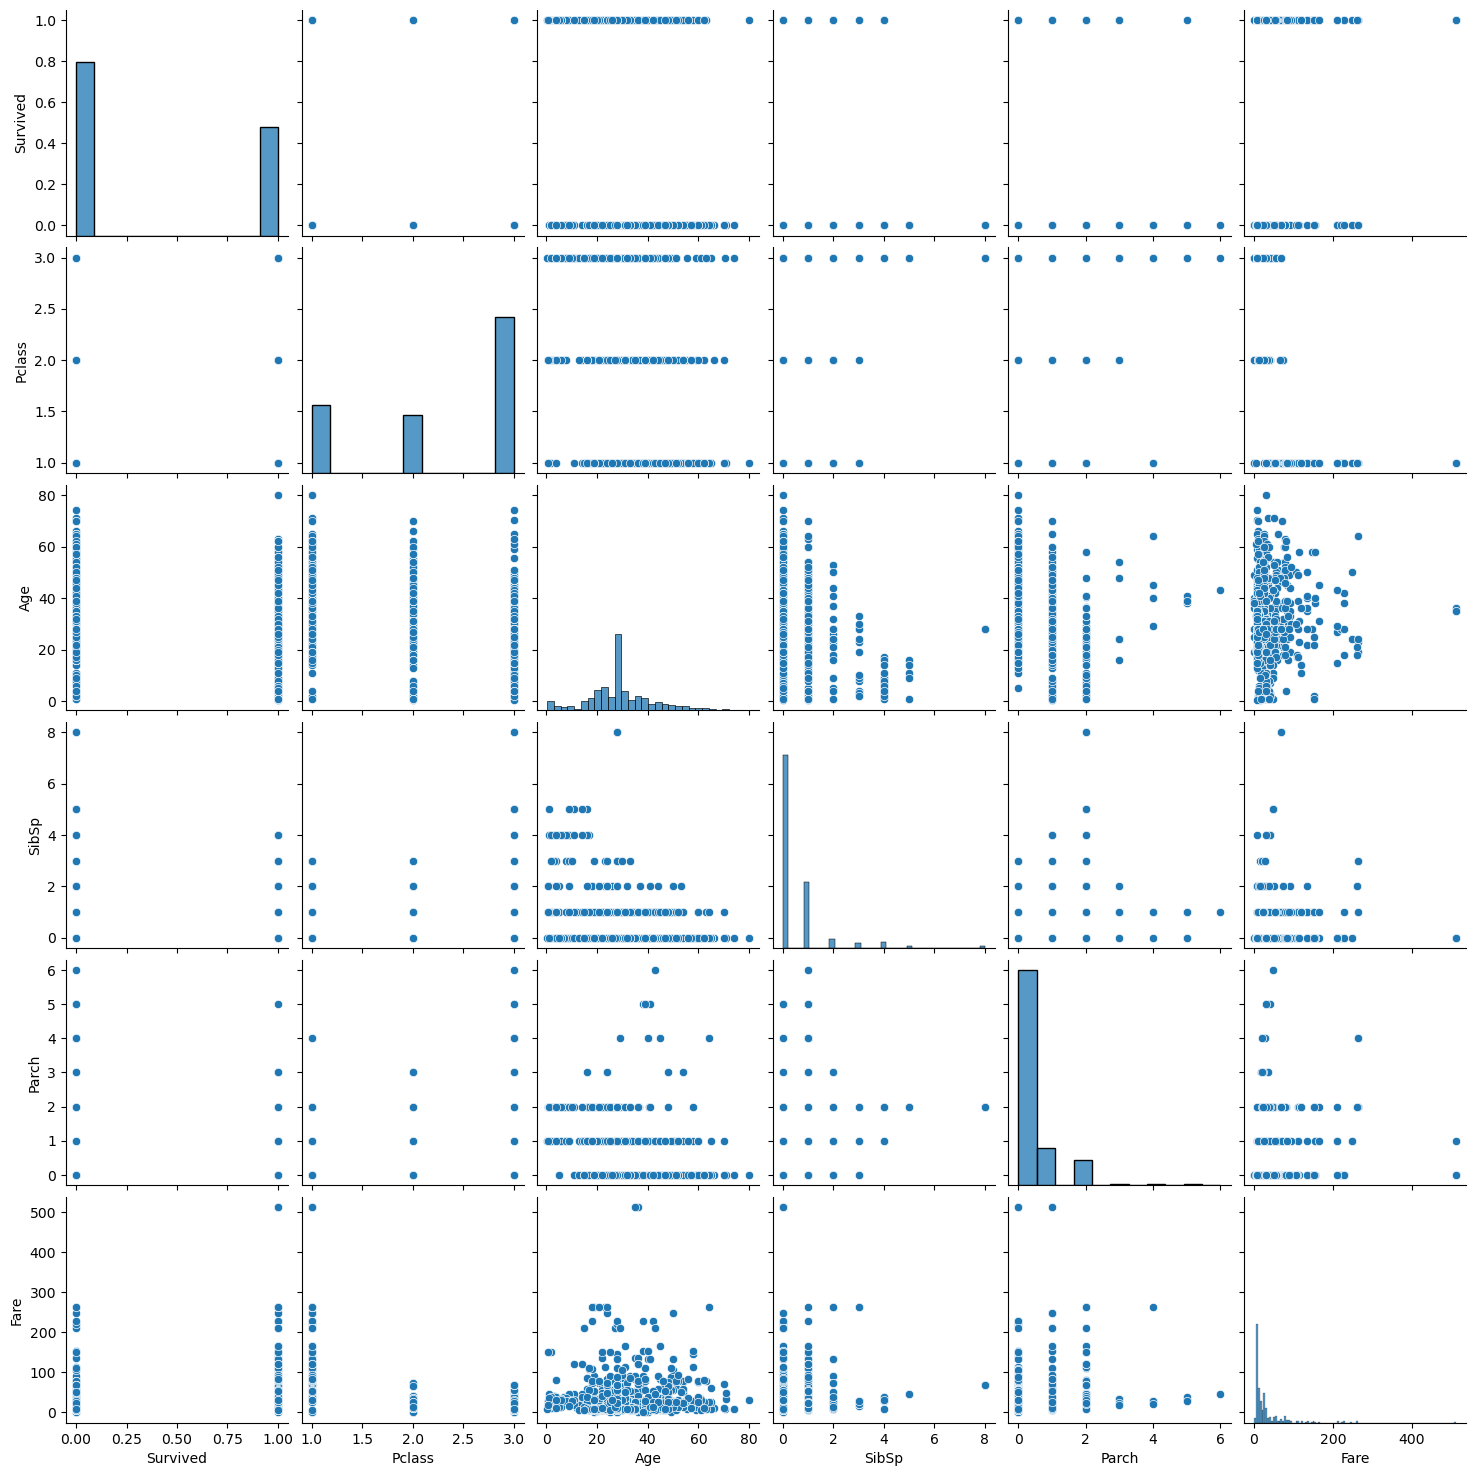

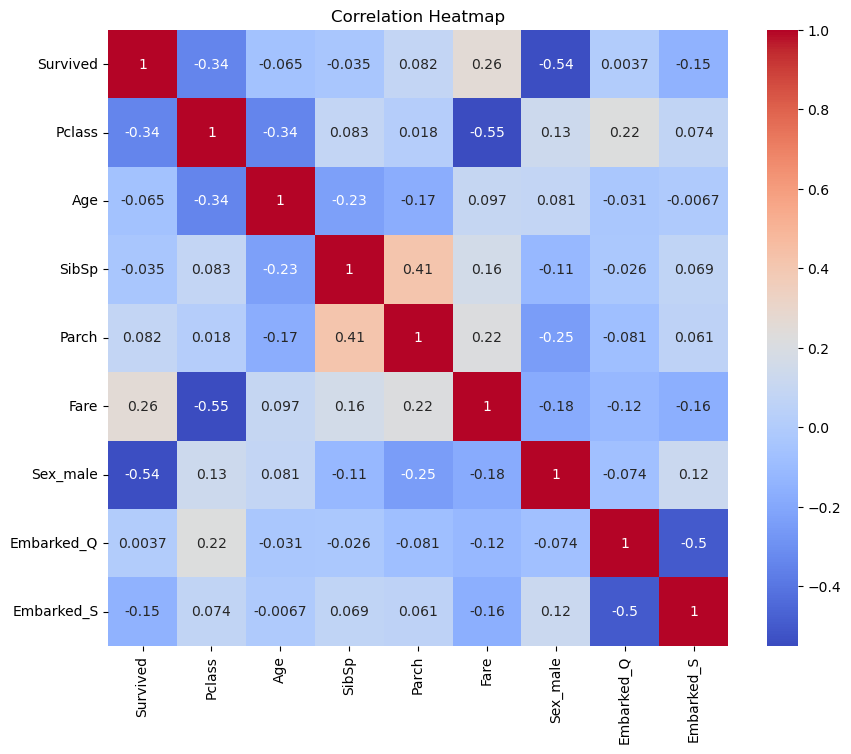

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Load the datasets
train_data = pd.read_csv('titanic_train.csv')
test_data = pd.read_csv('titanic_test.csv')

# Drop unwanted columns
train_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
test_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Handle missing values
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)
test_data['Embarked'].fillna(test_data['Embarked'].mode()[0], inplace=True)

# Encode categorical variables
train_data = pd.get_dummies(train_data, columns=['Sex', 'Embarked'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['Sex', 'Embarked'], drop_first=True)

# Ensure test data has the same columns as train data
missing_cols = set(train_data.columns) - set(test_data.columns)
for c in missing_cols:
    test_data[c] = 0
test_data = test_data[train_data.columns.drop('Survived')]

# Examine the features, their types, and summary statistics
print(train_data.info())
print(train_data.describe())

# Visualizations
sns.histplot(train_data['Age'].dropna(), kde=True)
plt.title('Age Distribution')
plt.show()

sns.boxplot(x='Pclass', y='Age', data=train_data)
plt.title('Age Distribution by Passenger Class')
plt.show()

sns.pairplot(train_data[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']])
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Separate features and target
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
test_data_scaled = scaler.transform(test_data)

# Build the model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Save the model and scaler
import pickle
with open('logistic_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)


Accuracy: 0.81
Precision: 0.79
Recall: 0.74
F1 Score: 0.76
ROC AUC Score: 0.88


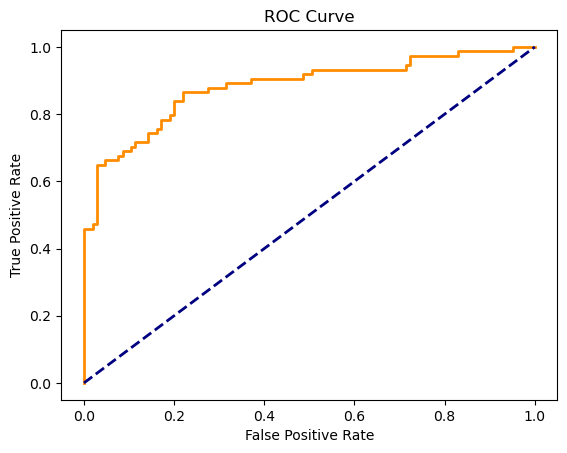

In [2]:
# Make predictions on the validation set
y_val_pred = model.predict(X_val_scaled)
y_val_pred_prob = model.predict_proba(X_val_scaled)[:, 1]

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_val, y_val_pred):.2f}')
print(f'Precision: {precision_score(y_val, y_val_pred):.2f}')
print(f'Recall: {recall_score(y_val, y_val_pred):.2f}')
print(f'F1 Score: {f1_score(y_val, y_val_pred):.2f}')
print(f'ROC AUC Score: {roc_auc_score(y_val, y_val_pred_prob):.2f}')

# ROC Curve
fpr, tpr, _ = roc_curve(y_val, y_val_pred_prob)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
